# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [18]:
import pandas as pd

blast_results_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

blast_results = pd.read_csv(
    blast_results_url,
    comment='#',
    header=None
)

fields = [
    "query acc.ver", "subject acc.ver", "perc_identity", "alignment_length",
    "mismatches", "gap_opens", "q.start", "q.end", "s.start", "s.end",
    "evalue", "bit_score", "score", "coverage", "taxonomy", "publications"
]

blast_results.columns = fields

blast_results.drop(columns=["query acc.ver"], inplace=True)

blast_results.set_index("subject acc.ver", inplace=True)

print(blast_results.head())



                 perc_identity  alignment_length  mismatches  gap_opens  \
subject acc.ver                                                           
NaN                        NaN               NaN         NaN        NaN   
NP_904328.1            100.000             318.0         0.0        0.0   
AGK29621.1              99.686             318.0         1.0        0.0   
YP_220563.1             99.686             318.0         1.0        0.0   
ACM24502.1              99.686             318.0         1.0        0.0   

                 q.start  q.end  s.start  s.end  evalue  bit_score   score  \
subject acc.ver                                                              
NaN                  NaN    NaN      NaN    NaN     NaN        NaN     NaN   
NP_904328.1          1.0  318.0      1.0  318.0     0.0      629.0  100.00   
AGK29621.1           1.0  318.0      1.0  318.0     0.0      629.0  100.00   
YP_220563.1          1.0  318.0      1.0  318.0     0.0      627.0  100.00   
ACM245

### Question 2
What is the average number of publications?

In [19]:
blast_results["publications"] = pd.to_numeric(blast_results["publications"], errors="coerce")

average_publications = blast_results["publications"].mean()

print(f"The average number of publications is: {average_publications:.2f}")



The average number of publications is: nan


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [20]:
over_15000 = blast_results[blast_results["alignment_length"] > 15000]

print("Subjects with over 15,000 bonds:")
print(over_15000.index.tolist())



Subjects with over 15,000 bonds:
[]


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

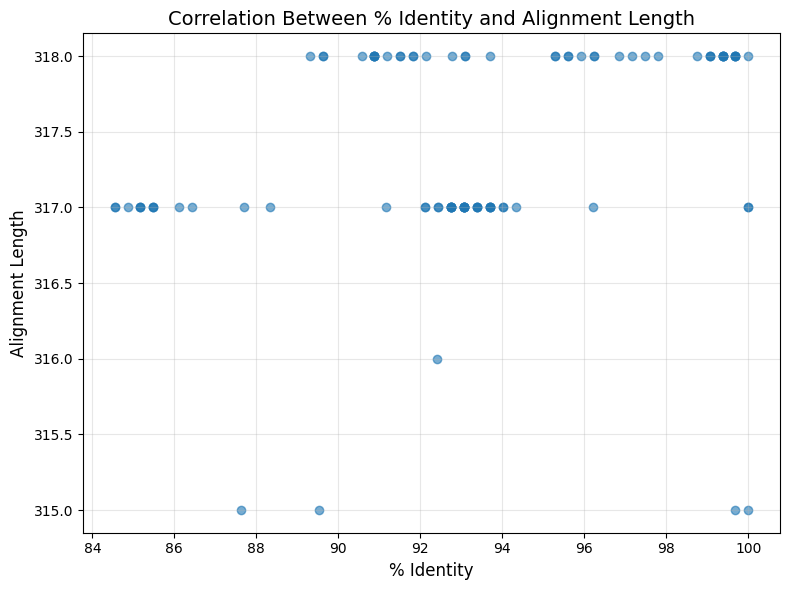

In [21]:
import matplotlib.pyplot as plt

blast_results["perc_identity"] = pd.to_numeric(blast_results["perc_identity"], errors="coerce")
blast_results["alignment_length"] = pd.to_numeric(blast_results["alignment_length"], errors="coerce")

plt.figure(figsize=(8, 6))
plt.scatter(blast_results["perc_identity"], blast_results["alignment_length"], alpha=0.6)

plt.title("Correlation Between % Identity and Alignment Length", fontsize=14)
plt.xlabel("% Identity", fontsize=12)
plt.ylabel("Alignment Length", fontsize=12)

# Show the plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [22]:
protein_source_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein_source = pd.read_csv(protein_source_url)

blast_results = blast_results.merge(
    protein_source,
    how="left",
    left_index=True,
    right_on="Protein"
)

print(blast_results.head())


     perc_identity  alignment_length  mismatches  gap_opens  q.start  q.end  \
NaN            NaN               NaN         NaN        NaN      NaN    NaN   
0.0        100.000             318.0         0.0        0.0      1.0  318.0   
NaN         99.686             318.0         1.0        0.0      1.0  318.0   
1.0         99.686             318.0         1.0        0.0      1.0  318.0   
NaN         99.686             318.0         1.0        0.0      1.0  318.0   

     s.start  s.end  evalue  bit_score   score  coverage taxonomy  \
NaN      NaN    NaN     NaN        NaN     NaN       NaN      NaN   
0.0      1.0  318.0     0.0      629.0  100.00    1,487         9   
NaN      1.0  318.0     0.0      629.0  100.00   17,947        47   
1.0      1.0  318.0     0.0      627.0  100.00   12,106        13   
NaN      1.0  318.0     0.0      627.0   99.69    2,319        41   

     publications  Unnamed: 0      Protein   Source  
NaN           NaN         NaN          NaN      NaN  
0.